In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./data.csv")
print(df.info() , "\n")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 3 columns):
date               667 non-null int64
signal             667 non-null float64
spy_close_price    667 non-null float64
dtypes: float64(2), int64(1)
memory usage: 15.7 KB
None 

       date    signal  spy_close_price
0  20120103  3.107767          127.495
1  20120104  3.107282          127.700
2  20120105  3.099757          128.040
3  20120106  3.134223          127.710
4  20120109  3.135922          128.020


In [2]:
if df.isnull().values.any():
    print("There are missing values in data.csv\n")
    print(df.isnull().sum())
else:
    print("There are no missing values in data.csv\n")

There are no missing values in data.csv



In [3]:
#Checked all dates are weekdays
df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df["weekday"] = df["date"].dt.weekday
baddays = df.query("weekday > 4")
baddays

,date,signal,spy_close_price,weekday
525,2014-02-08,4.466505,179.68,5
526,2014-02-09,4.466505,179.68,6


In [4]:
#drop the bad rows
df = df.drop([525,526],axis=0)
#drop the weekday column that we added just before as it is not used in our prediction
df = df.drop(['weekday'],axis=1)
#the number of rows should now be 667-2, or 665
df.shape

(665, 3)

In [5]:
spy_mean = df['spy_close_price'].mean()
spy_std = df['spy_close_price'].std()
#print("spy_close_price mean: ", spy_mean)
#print("spy_close_price std: ", spy_std)

def setBadSpyToNaN(val):
    if (val > spy_mean + 2*spy_std) or (val < spy_mean - 2*spy_std): 
        val = np.nan
    return val

#first set all values of spy_close_price that are more than two std away from mean to NaN
df["spy_close_price"] = df["spy_close_price"].apply(setBadSpyToNaN)
#use the interpolate method to fill in the NaN values
df["spy_close_price"] = df["spy_close_price"].interpolate()

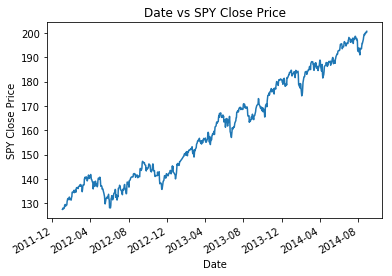

In [6]:
#plot date vs spy_close_price
plt.plot(df['date'].values,df['spy_close_price'].values)
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("SPY Close Price")
plt.title("Date vs SPY Close Price")
plt.show()

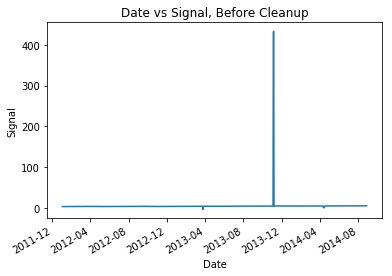

In [7]:
#plot date vs signal
plt.plot(df['date'].values,df['signal'].values)
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Signal")
plt.title('Date vs Signal, Before Cleanup')
plt.show()

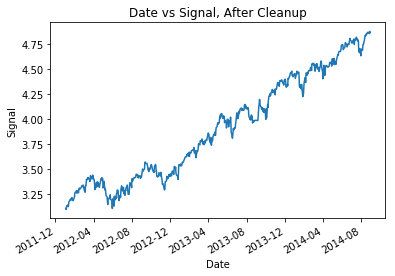

In [8]:
#unable to use mean and std for this, used best judgement based on observing the data
def setBadSignalToNaN(val):
    if (val > 10) or (val < 2): 
        val = np.nan
    return val

#first set all the bad values to NaN
df["signal"] = df["signal"].apply(setBadSignalToNaN)
#use the interpolate method to fill in
df["signal"] = df["signal"].interpolate()

plt.plot(df['date'].values,df['signal'].values)
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Signal")
plt.title('Date vs Signal, After Cleanup')
plt.show()

In [ ]:
scaler = StandardScaler()
# Fit to the training data
scaler.fit(x_train)